# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

In [44]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
raw_data = pd.read_csv("data/bike-sharing_hourly.csv")

In [46]:
raw_data.head(200)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2011-01-09,1,0,1,10,0,0,0,1,0.14,0.1061,0.43,0.3881,0,49,49
196,197,2011-01-09,1,0,1,11,0,0,0,1,0.16,0.1212,0.40,0.5224,2,47,49
197,198,2011-01-09,1,0,1,12,0,0,0,1,0.18,0.1364,0.37,0.4478,4,79,83
198,199,2011-01-09,1,0,1,13,0,0,0,1,0.20,0.1667,0.34,0.4478,6,69,75


<AxesSubplot: xlabel='yr,mnth'>

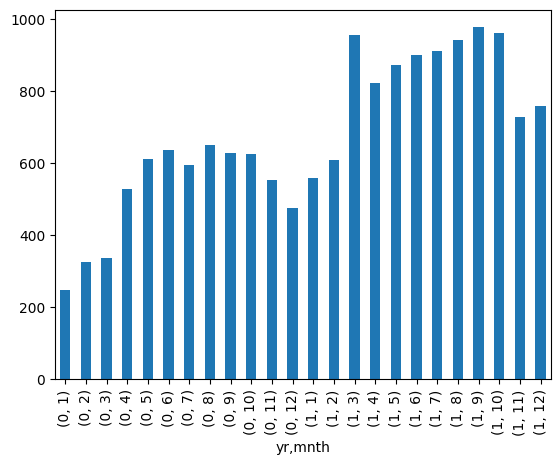

In [47]:
raw_data.groupby(["yr", "mnth"])["cnt"].max().plot(kind="bar")

/var/folders/jz/7k4lz9z91w92yqvc2ffzy2b80000gn/T/ipykernel_39791/2141578805.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/jz/7k4lz9z91w92yqvc2ffzy2b80000gn/T/ipykernel_39791/2141578805.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



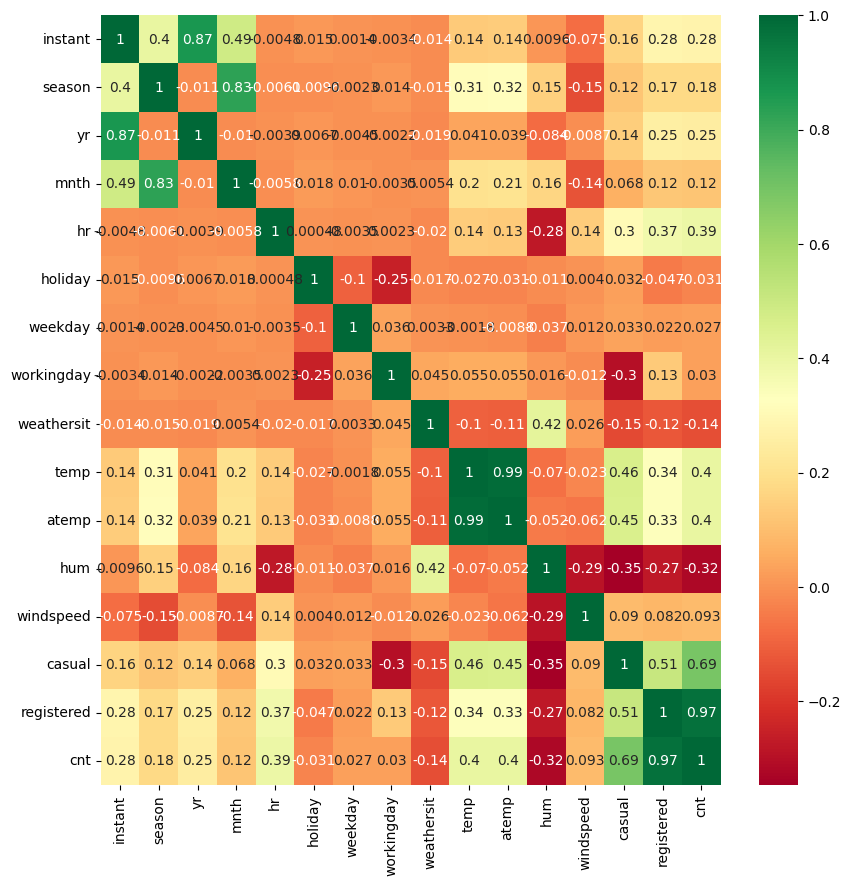

In [48]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), annot=True, cmap="RdYlGn")
fig.show()

### info()

We used the info() function to check for null values and the Dtype for all the columns.

In [49]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [50]:
raw_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### describe()

We checked the max and min values for season, year, month, hour and weekday for anomalies such as month > 12 or hour > 23. Further

In [51]:
raw_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [52]:
data = raw_data
data = data.astype({
    "instant": "int64",
    "dteday": "datetime64",
    "season": "category",
    "yr": "category",
    "mnth": "category",
    "hr": "category",
    "holiday": "bool",
    "weekday": "category",
    "workingday": "bool",
    "weathersit": "category",
    "temp": "float64",
    "atemp": "float64",
    "hum": "float64",
    "windspeed": "float64",
    "casual": "int64",
    "registered": "int64",
    "cnt": "int64"
})

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  bool          
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Numerical Variables

In [54]:
dict_daylight = {
    1: 9.8,
    2: 10.82,
    3: 11.98,
    4: 13.26,
    5: 14.34,
    6: 14.93,
    7: 14.68,
    8: 13.75,
    9: 12.5,
    10: 11.25,
    11: 10.12,
    12: 9.5
}

daylight_hrs = pd.DataFrame(dict_daylight.items(), columns=['mnth', 'daylight_hrs'])

data = data.join(daylight_hrs.set_index('mnth'), on='mnth')

data['daylight_hrs'] = data['daylight_hrs'].astype('float64')

<AxesSubplot: ylabel='cnt'>

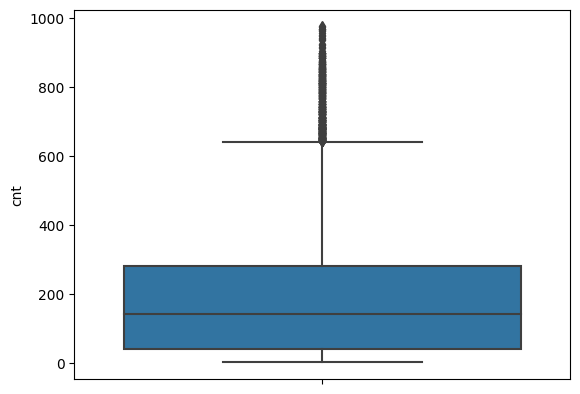

In [55]:
sns.boxplot(data=data, y="cnt")

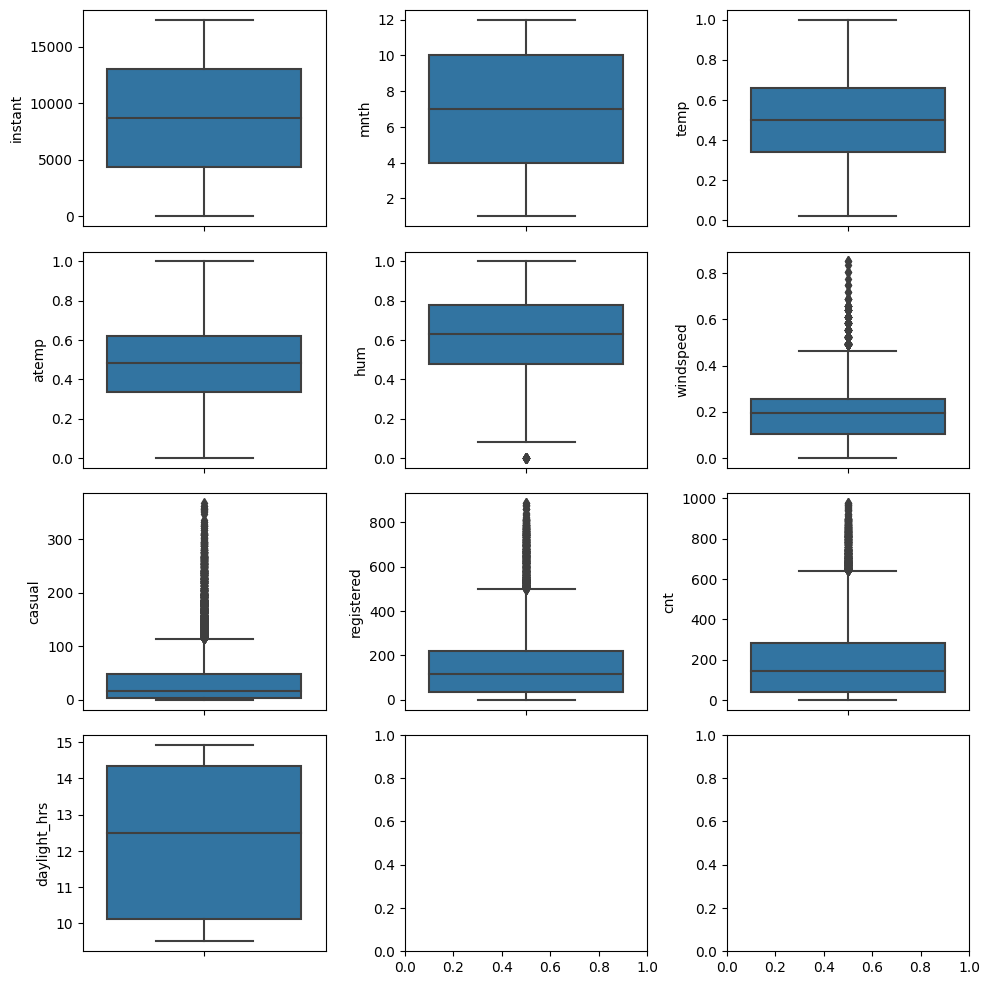

In [56]:
# Create subplots of all the numerical variables as boxplots
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(10, 10))

index = 0
axs = axs.flatten()

for key, value in data.select_dtypes(include=['float64', 'int64']).items():
    sns.boxplot(y=value, ax=axs[index])
    index += 1

# Show the subplots
plt.tight_layout()
plt.show()

### Outliers

As we figured out, there are a lot outliers in the casual and cnt column. We're deleting all rows that have a value greater than 2.5 * std()

In [57]:
data = data[np.abs(data["cnt"]-data["cnt"].mean())<=(2.5*data["cnt"].std())]

In [58]:
# data = data[np.abs(data["casual"]-data["casual"].mean())<=(2.5*data["casual"].std())]

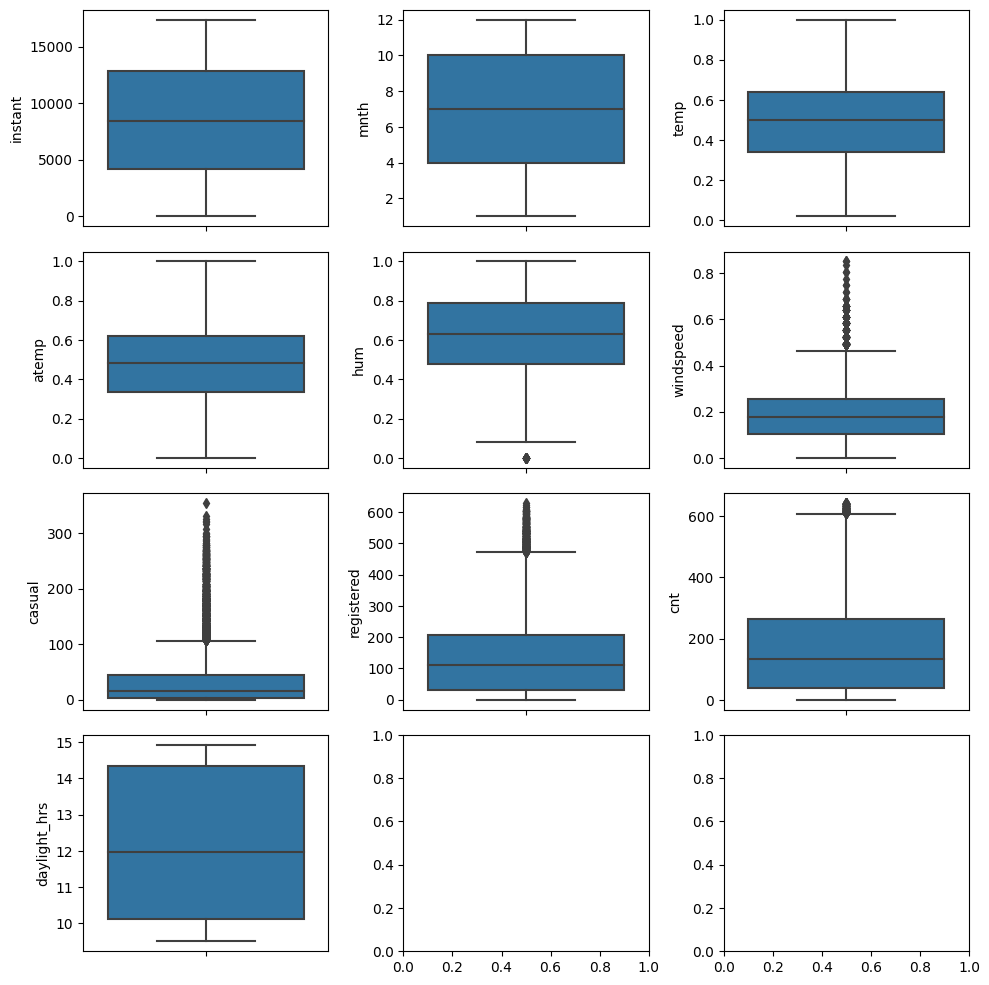

In [59]:
# Create subplots of all the numerical variables as boxplots
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(10, 10))

index = 0
axs = axs.flatten()

for key, value in data.select_dtypes(include=['float64', 'int64']).items():
    sns.boxplot(y=value, ax=axs[index])
    index += 1

# Show the subplots
plt.tight_layout()
plt.show()

In [60]:
data.shape

(16874, 18)

[Text(0.5, 0, 'Holiday'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Holiday')]

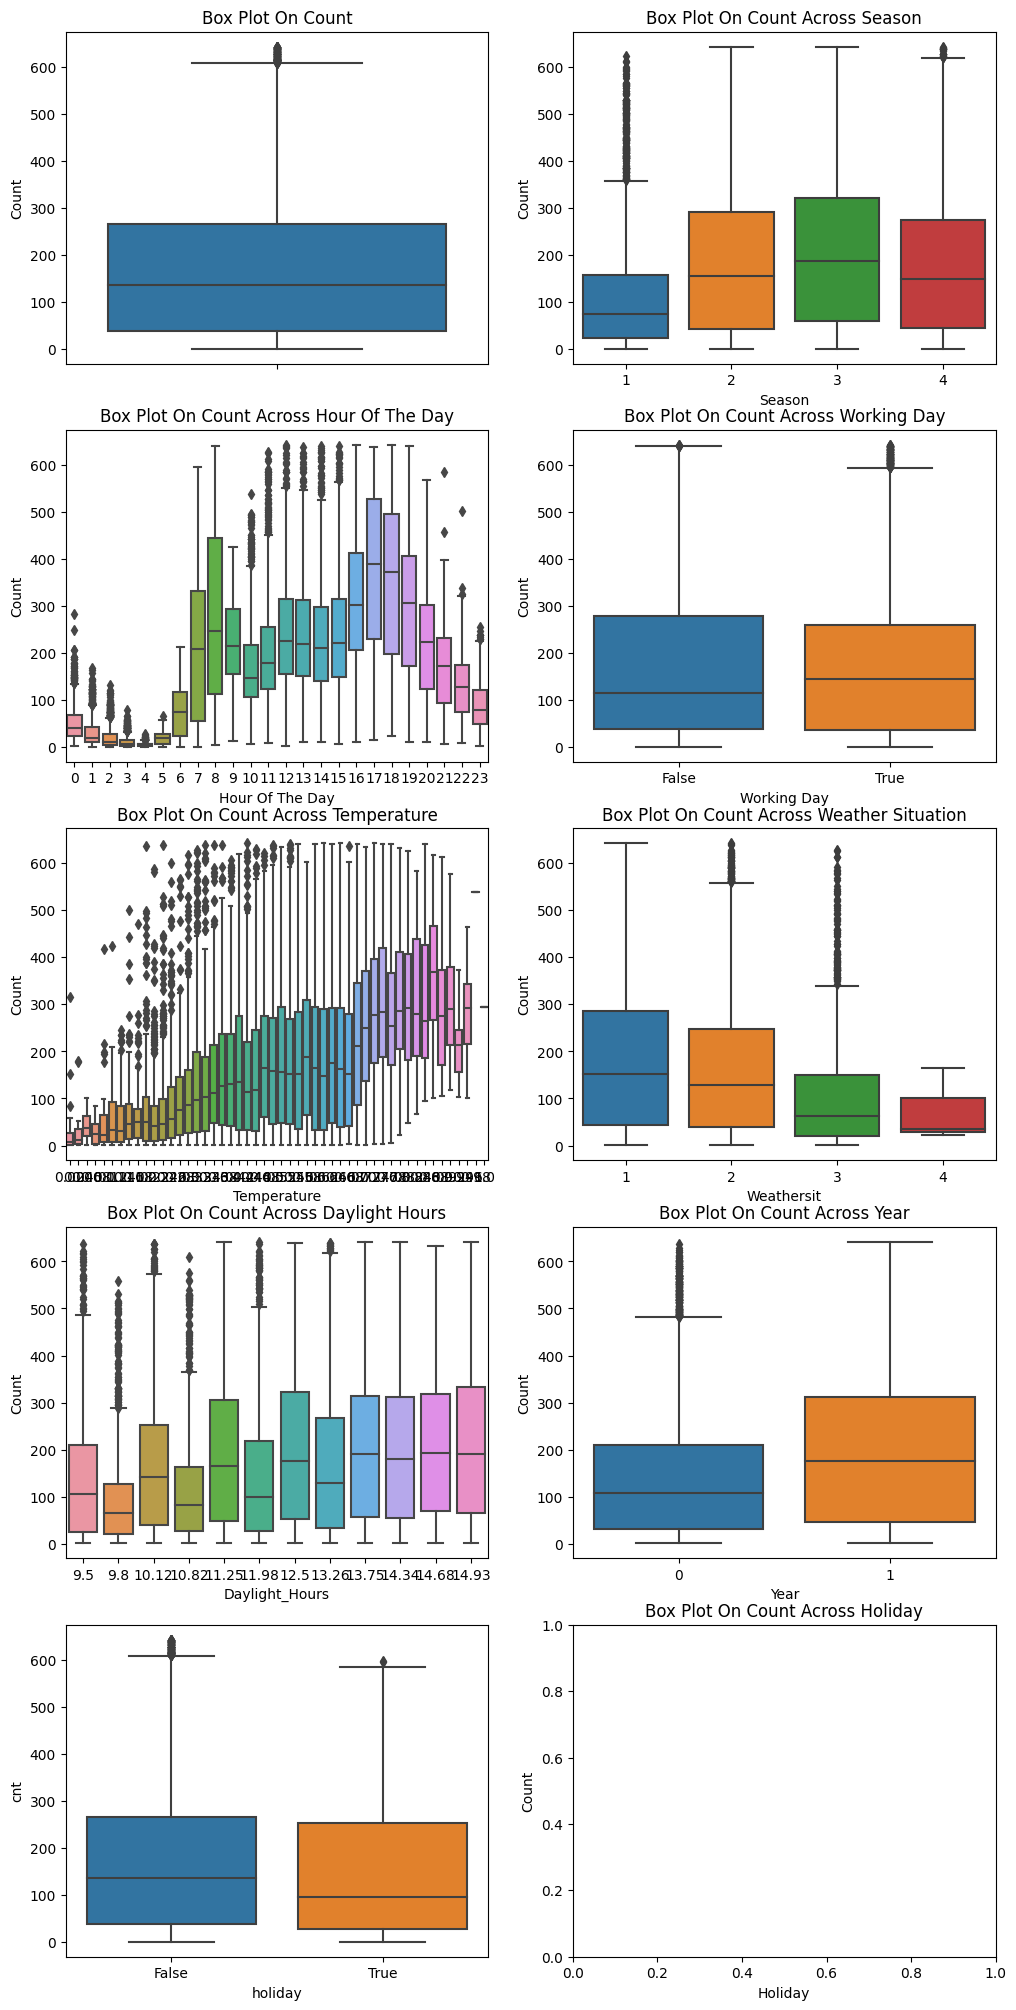

In [61]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 25)
sns.boxplot(data=data,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=data,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[1][0])
sns.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=data,y="cnt",x="temp",orient="v",ax=axes[2][0])
sns.boxplot(data=data,y="cnt",x="weathersit",orient="v",ax=axes[2][1])
sns.boxplot(data=data,y="cnt",x="daylight_hrs",orient="v",ax=axes[3][0])
sns.boxplot(data=data,y="cnt",x="yr",orient="v",ax=axes[3][1])
sns.boxplot(data=data,y="cnt",x="holiday",orient="v",ax=axes[4][0])


axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")
axes[2][1].set(xlabel='Weathersit', ylabel='Count',title="Box Plot On Count Across Weather Situation")
axes[3][0].set(xlabel='Daylight_Hours', ylabel='Count',title="Box Plot On Count Across Daylight Hours")
axes[3][1].set(xlabel='Year', ylabel='Count',title="Box Plot On Count Across Year")
axes[4][1].set(xlabel='Holiday', ylabel='Count',title="Box Plot On Count Across Holiday")

In [62]:
data.to_csv("data/bike-sharing_hourly_cleaned.csv", index=False)

<AxesSubplot: xlabel='weekday'>

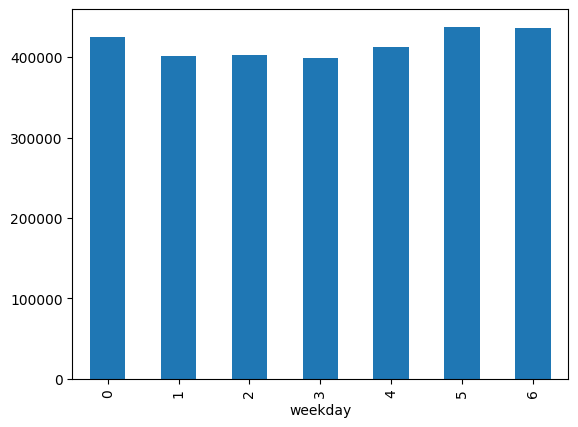

In [63]:
data.groupby(["weekday"])["cnt"].sum().plot(kind="bar")

<AxesSubplot: xlabel='mnth'>

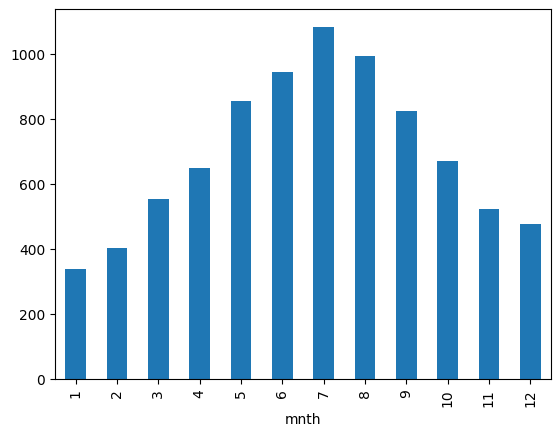

In [64]:
data.groupby(["mnth"])["temp"].sum().plot(kind="bar")

/var/folders/jz/7k4lz9z91w92yqvc2ffzy2b80000gn/T/ipykernel_39791/2819141512.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot: xlabel='weekday'>

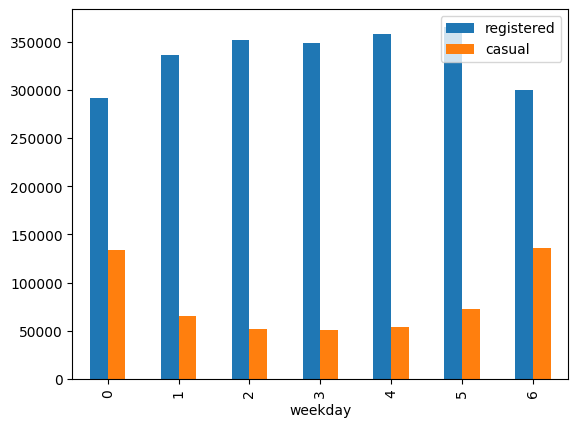

In [65]:
data.groupby("weekday")["registered", "casual"].sum().plot(kind="bar")

data.groupby("weathersit")["registered", "casual"].mean().plot(kind="bar")

data.groupby("hr")["registered", "casual"].mean().plot(kind="bar")

/var/folders/jz/7k4lz9z91w92yqvc2ffzy2b80000gn/T/ipykernel_39791/880688735.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot: xlabel='yr,mnth'>

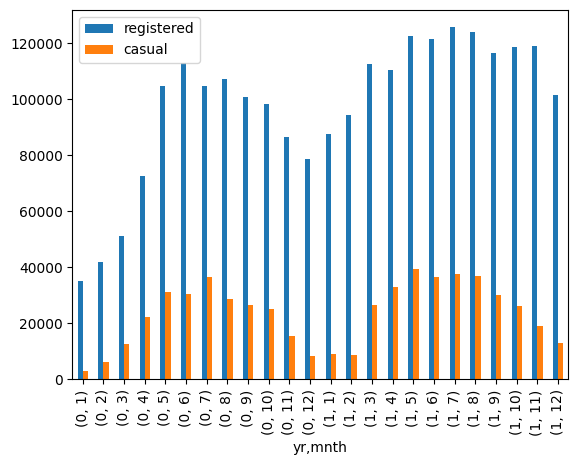

In [66]:
data.groupby(["yr", "mnth"])["registered", "casual"].sum().plot(kind="bar")

In [67]:
px.line(data_frame=data, x="dteday", y="cnt", hover_data=["weekday"])

### Categorical Variables

In [68]:
# data["day"] = data["dteday"].dt.day.astype("category")
#data["season-weekday"] = data["season"].astype(str) + data["weekday"].astype(str)
#data["season-weekday"] = data["season-weekday"].astype("category")

#data["month-hour"] = data["mnth"].astype(str) +"-"+ data["hr"].astype(str)
#data["month-hour"] = data["month-hour"].astype("category")

In [69]:
#fig = plt.figure(figsize=(20, 40))
#sns.countplot(y="month-hour", data=data, order=data["month-hour"].value_counts().index)

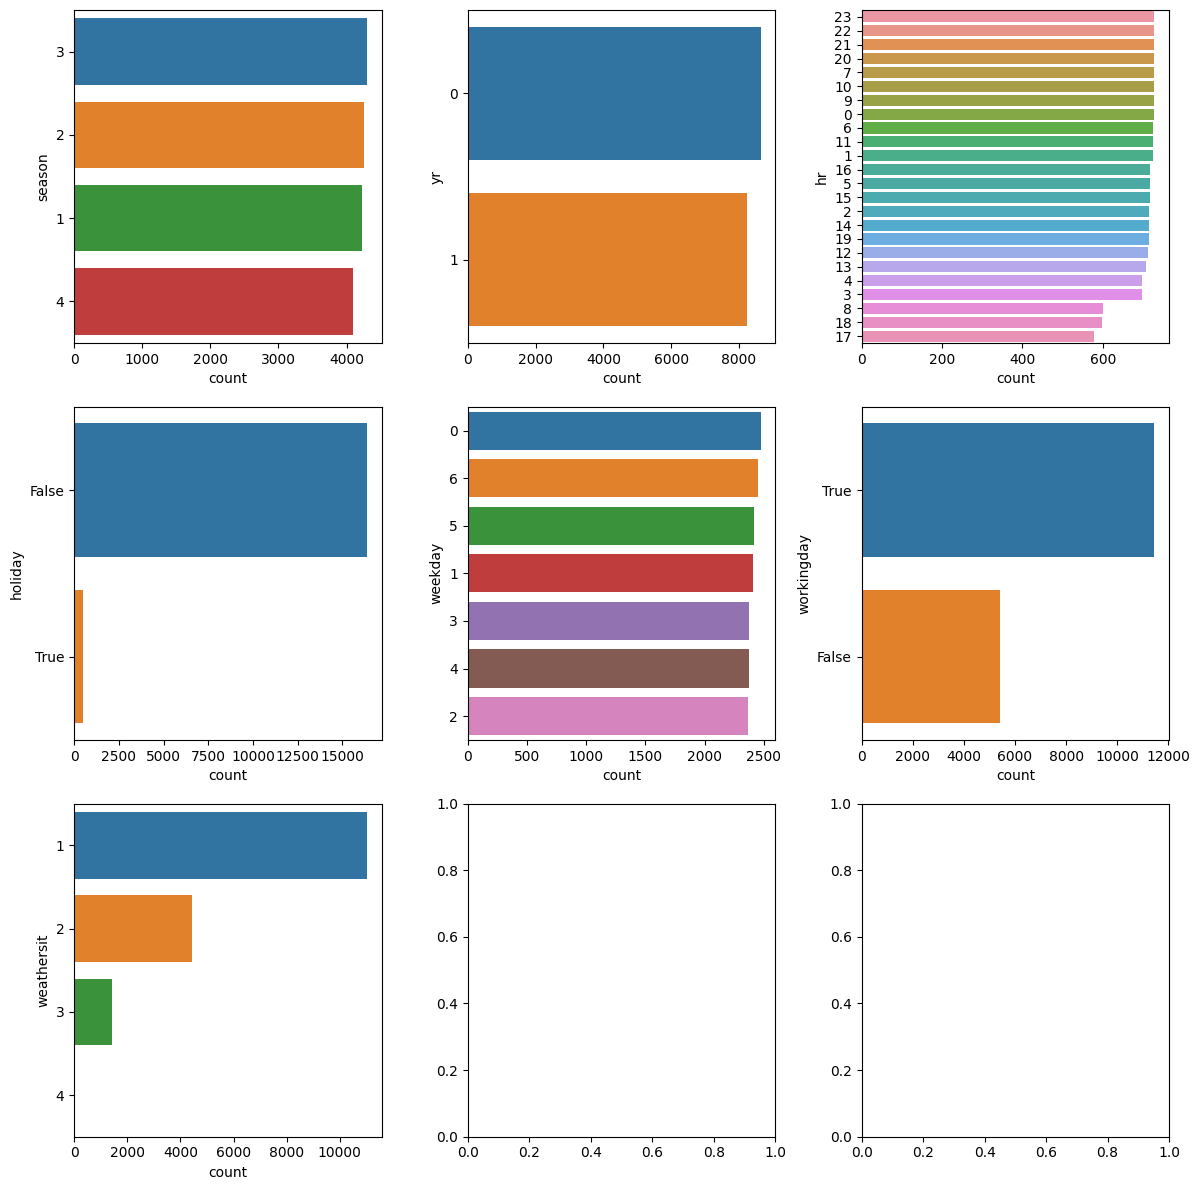

In [70]:
# Create subplots of all the categorical variables as barplots
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))

index = 0
axs = axs.flatten()

for key, value in data.select_dtypes(include=['category', 'bool']).items():
    sns.countplot(y=value, ax=axs[index], order=data[key].value_counts().index)
    index += 1

# Show the subplots
plt.tight_layout()
plt.show()


In [71]:
data.groupby("weathersit").count()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,daylight_hrs
weathersit,,,,,,,,,,,,,,,,,
1,11020,11020,11020,11020,11020,11020,11020,11020,11020,11020,11020,11020,11020,11020,11020,11020,11020
2,4444,4444,4444,4444,4444,4444,4444,4444,4444,4444,4444,4444,4444,4444,4444,4444,4444
3,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407
4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [72]:
data.groupby("holiday").count()

,instant,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,daylight_hrs
holiday,,,,,,,,,,,,,,,,,
False,16376,16376,16376,16376,16376,16376,16376,16376,16376,16376,16376,16376,16376,16376,16376,16376,16376
True,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498


/var/folders/jz/7k4lz9z91w92yqvc2ffzy2b80000gn/T/ipykernel_39791/2270241714.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



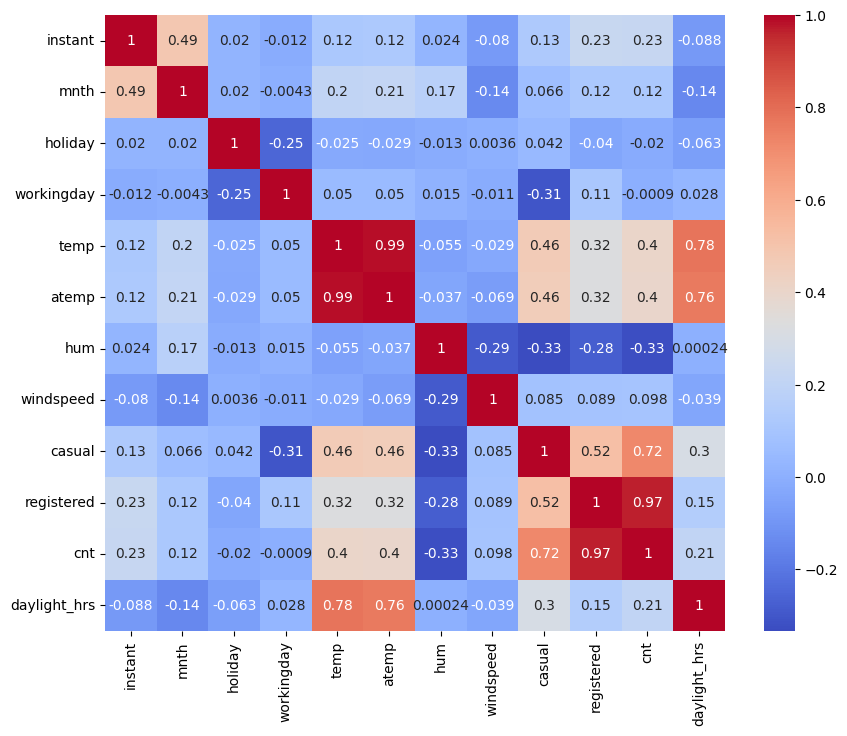

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

Casuals are more likely in days with higher daylight_hrs. Registered customers don't have a high corr with the daylight_hrs

### Giving insights on what seems relevant for prediction and what does not.

In [74]:
# Create a new column for the target variable
#data["cnt_grouped"] = pd.cut(data["cnt"], bins=30,
                             #labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                              #       23, 24, 25, 26, 27, 28, 29])

In [75]:
#data.groupby("cnt_grouped").count()

In [76]:
#import pandas_profiling

#profile = pandas_profiling.ProfileReport(data)
#profile.to_file("bike-sharing.html")

In [77]:
season = pd.get_dummies(data['season'], prefix='season')
data = pd.concat([data, season], axis=1)
weather=pd.get_dummies(data['weathersit'],prefix='weathersit')
data=pd.concat([data,weather],axis=1)
weekday=pd.get_dummies(data['weekday'],prefix='weekday')
data=pd.concat([data,weekday],axis=1)
month = pd.get_dummies(data['mnth'], prefix='mnth')
data = pd.concat([data, month], axis=1)
data['night_hr'] = data['hr'].map(lambda x: 0 if (x < 7 | x == 23) else 1)
data['peak_hr'] = data['hr'].map(lambda x: 1 if x in [7,8,9,16,17,18,19] else 0)
data.drop(['season','weathersit', "weekday", "registered", "mnth", "dteday", "temp", "instant", "casual"],inplace=True,axis=1)
data

,yr,hr,holiday,workingday,atemp,hum,windspeed,cnt,daylight_hrs,season_1,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,night_hr,peak_hr
0,0,0,False,False,0.2879,0.81,0.0000,16,9.8,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,False,False,0.2727,0.80,0.0000,40,9.8,1,...,0,0,0,0,0,0,0,0,1,0
2,0,2,False,False,0.2727,0.80,0.0000,32,9.8,1,...,0,0,0,0,0,0,0,0,1,0
3,0,3,False,False,0.2879,0.75,0.0000,13,9.8,1,...,0,0,0,0,0,0,0,0,1,0
4,0,4,False,False,0.2879,0.75,0.0000,1,9.8,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,19,False,True,0.2576,0.60,0.1642,119,9.5,1,...,0,0,0,0,0,0,0,1,0,1
17375,1,20,False,True,0.2576,0.60,0.1642,89,9.5,1,...,0,0,0,0,0,0,0,1,0,0
17376,1,21,False,True,0.2576,0.60,0.1642,90,9.5,1,...,0,0,0,0,0,0,0,1,0,0
17377,1,22,False,True,0.2727,0.56,0.1343,61,9.5,1,...,0,0,0,0,0,0,0,1,0,0


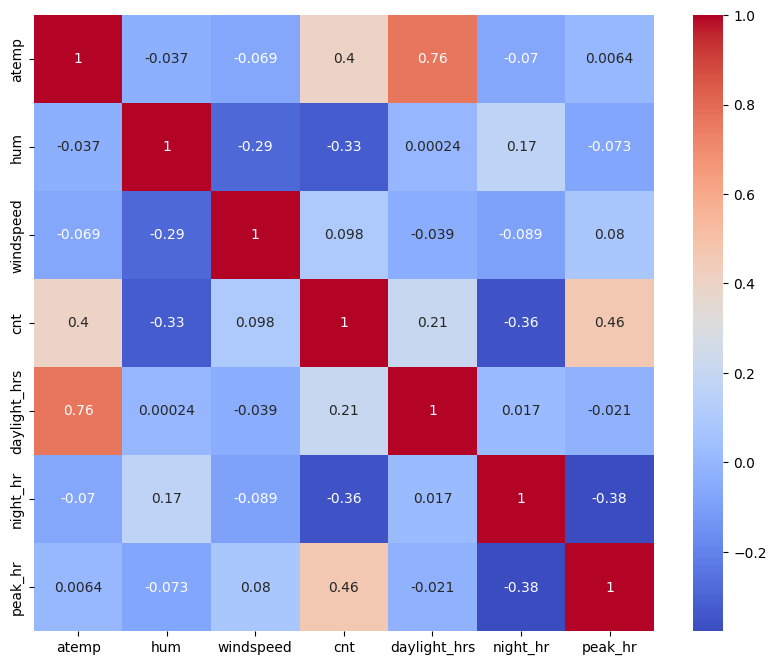

In [78]:
plt.figure(figsize=(10, 8))
num_values = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(num_values.corr(), annot=True, cmap='coolwarm')
plt.show()

## PART II: Prediction Model

In [79]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data.drop('cnt',axis=1),data['cnt'],test_size=0.25,random_state=42)

In [80]:
y_train.max()

642

In [85]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error

models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor(), DecisionTreeRegressor(), SVR()]

model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR']

rmse=[]
d={}

for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    try:
        rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
    except:
        print("Error in ",model_names[model])
        
res={'Modelling Algo':model_names,'RMSE':rmse}   
res

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'KNeighborsRegressor',
  'DecisionTreeRegressor',
  'SVR'],
 'RMSE': [38.094947621271295,
  102.38913376393654,
  39.60211548841125,
  61.07083954328714,
  54.74198838847009,
  117.39592845838783]}

In [88]:
rmsle_frame=pd.DataFrame(res)
rmsle_frame.to_csv("data/rmse_frame.csv",index=False)

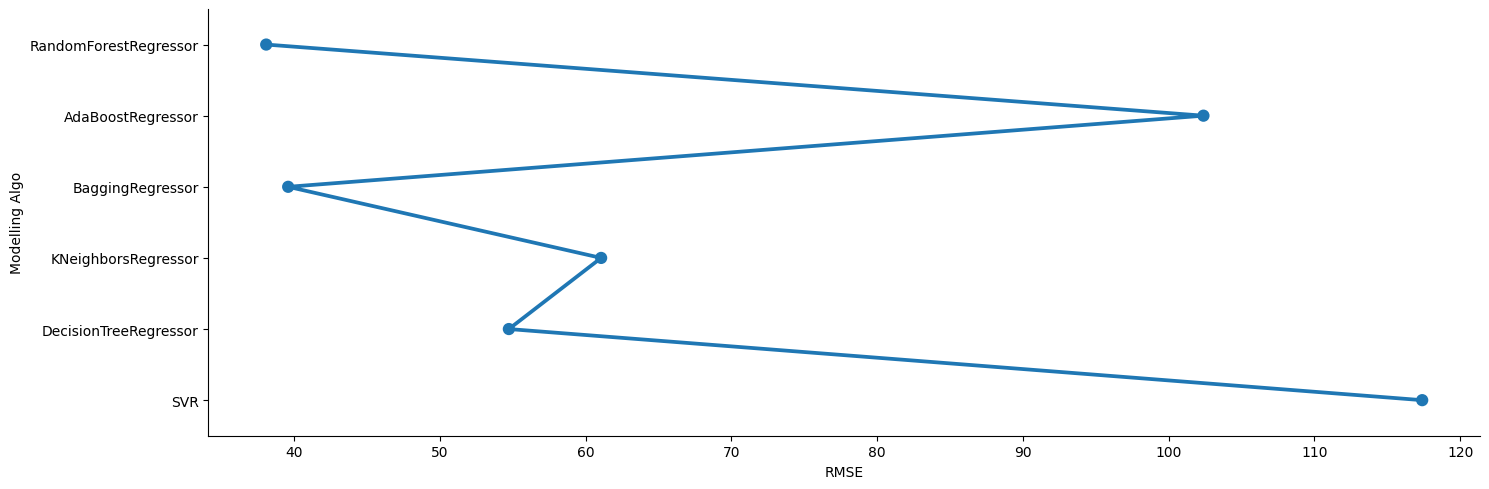

In [89]:
sns.catplot(y='Modelling Algo',x='RMSE',data=rmsle_frame, kind='point',height=5,aspect=3)

## Randomforest

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

In [91]:
model = RandomForestRegressor()

parameters = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 400, 600]
}


search_rfm = RandomizedSearchCV(
    model,                               
    param_distributions = parameters,    
    scoring="neg_mean_squared_log_error",                 
    cv=3,                             
    refit=True,                                               
    return_train_score=True,            
    n_iter=100,
    n_jobs=-1,                          
)

In [92]:
search_rfm.fit(x_train, y_train)

/opt/homebrew/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 400, 600]},
                   return_train_score=True,
                   scoring='neg_mean_squared_log_error')

In [ ]:
print(search_rfm.best_params_)
print(search_rfm.best_score_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
-0.12939145009554032


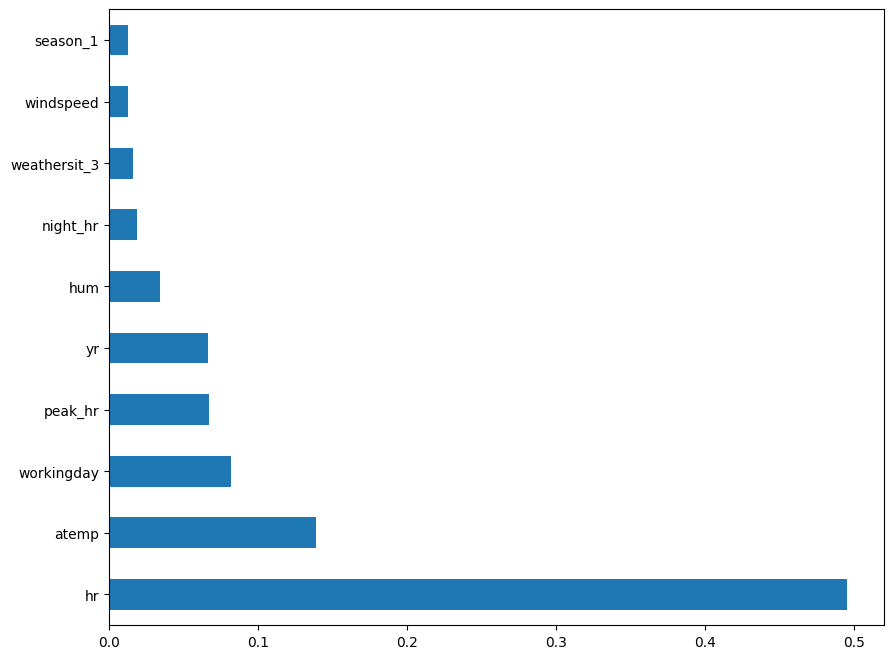

In [ ]:
plt.figure(figsize=(10, 8))
feat_importances = pd.Series(search_rfm.best_estimator_.feature_importances_, index=x_train.columns)
feat_importances.to_csv("data/feat_importances.csv")
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [96]:
from sklearn.model_selection import GridSearchCV

params_dict={'n_estimators': [100, 200, 400, 600],
             'n_jobs':[-1],
             'max_features':["auto",'sqrt','log2']}

clf_rf=GridSearchCV(estimator=RandomForestRegressor()
                    ,param_grid=params_dict
                    ,scoring='neg_mean_squared_log_error')

clf_rf.fit(x_train,y_train)

pred_rf=clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred_rf,y_test))))

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors a

0.32842619431947645


In [99]:
print(clf_rf.best_params_)
print(clf_rf.best_score_)
print(clf_rf.best_estimator_)

print(search_rfm.best_params_)
print(search_rfm.best_score_)
print(search_rfm.best_estimator_)


{'max_features': 'auto', 'n_estimators': 400, 'n_jobs': -1}
-0.12551011280892627
RandomForestRegressor(max_features='auto', n_estimators=400, n_jobs=-1)
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
-0.12939145009554032
RandomForestRegressor(max_depth=20, n_estimators=200)


In [100]:
test_model = clf_rf.best_estimator_.fit(x_train, y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



In [103]:
import pickle

filename = 'models/rf_model.sav'
pickle.dump(test_model, open(filename, 'wb'))

In [ ]:
# for KNN
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(x_train,y_train)
pred_knn=clf_knn.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

In [ ]:
clf_knn.best_params_

In [ ]:
pred=clf_rf.predict(x_test)

# pred and y_test next to each other
pd.DataFrame({'Actual': y_test, 'Predicted': pred})

#import from sklearn all metrics for multiclass and continuous data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
mean_squared_log_error(y_test,pred)

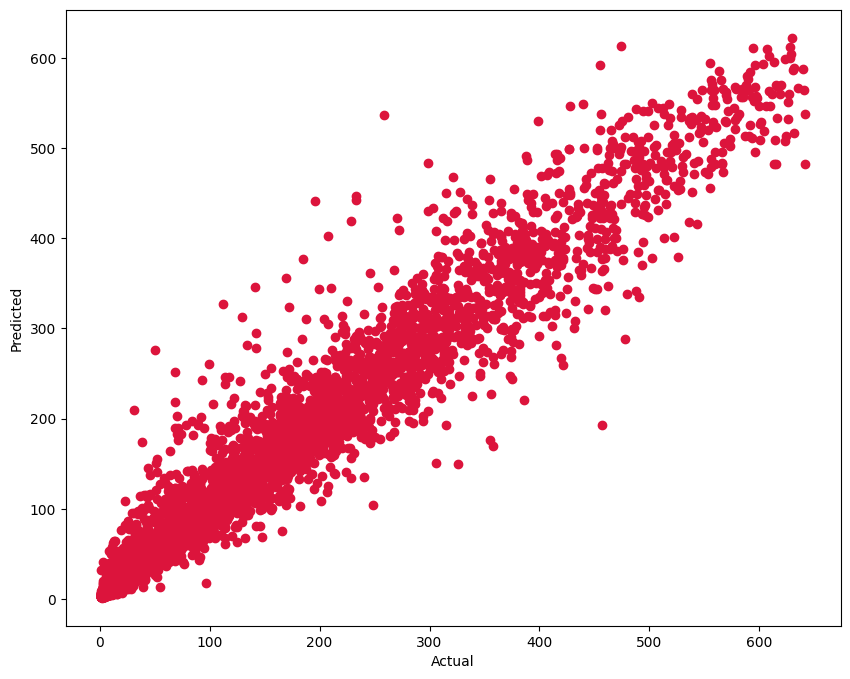

In [102]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, test_model.predict(x_test), c='crimson')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
 

## PART III: Streamlit dashboard

In [ ]:
### This part goes in a separate script ###